In [1]:
import pandas as pd
pd.__version__

 

'2.3.3'

* 오늘 실습의 전체 시나리오
    * 동네 카페 사장에게서 **CSV 형태의 매출 데이터**를 전달받음
    * 데이터는 데이터베이스(DB)가 아닌 **파일 형태**로 주어짐
    * 실제 실무에서는 DB 직접 접근보다 CSV / Excel / JSON 파일을 받는 경우가 훨씬 많음
    * 이 데이터는 분석이 바로 불가능할 정도로 **지저분한 상태**임

---

* 왜 전처리가 중요한가
    * 지저분한 데이터를 그대로 분석하거나 머신러닝에 사용하면 결과 품질이 급격히 떨어짐
    * 전처리는 데이터를 `분석 가능한 상태`로 만드는 작업
    * 전처리는 성능 개선 방법 중 가장 직접적이고 효과적인 방법

---

* 실습 데이터의 원형 구조
    * 원본 데이터는 `list` 안에 `dict`가 여러 개 들어 있는 형태
    * 이 구조는 테이블 데이터를 파이썬 기본 자료형으로 표현하는 가장 대표적인 방식

    * 예시 개념
        * 리스트 → 테이블 전체
        * 딕셔너리 하나 → 레코드(행)
        * 딕셔너리의 key → 컬럼

---

* pandas란 무엇인가
    * 파이썬에서 **엑셀/테이블 형태 데이터**를 다루기 위한 핵심 라이브러리
    * SQL 테이블과 매우 유사한 사고방식을 가짐
    * DataFrame은 SQL의 테이블 개념과 거의 동일함
    
---

* 오늘 실습에서 다루는 핵심 목표
    * pandas 라이브러리를 사용해 데이터 불러오기
    * pandas의 핵심 구조인 **Series / DataFrame 이해**
    * 컬럼 단위 데이터 타입 확인 및 정리
    * 결측치(NaN) 확인 및 처리
    * 파생 컬럼(feature) 생성
    * 전처리 전체 프로세스를 한 번 끝까지 경험

In [2]:
##데이터 *문제가 곁들여진*

raw = [
    {"date": "2026-01-01", "menu": "Americano", "price": "4500원", "qty": "2", "paid": "TRUE"},
    {"date": "2026/01/01", "menu": "Latte",     "price": "5,000",  "qty": 1,   "paid": "True"},
    {"date": "2026-01-02", "menu": "Latte",     "price": None,     "qty": 2,   "paid": "FALSE"},
    {"date": "2026-01-03", "menu": "Mocha",     "price": "5500",   "qty": None,"paid": True},
    {"date": "2026-01-03", "menu": "Americano", "price": "4500",   "qty": 1,   "paid": "TRUE"},
    {"date": "2026-01-04", "menu": "Latte",     "price": "5000원", "qty": "3", "paid": "TRUE"},
    {"date": "2026-01-05", "menu": "Tea",       "price": "4000",   "qty": "1", "paid": "TRUE"},
]

df = pd.DataFrame(raw)
df


,date,menu,price,qty,paid
0,2026-01-01,Americano,4500원,2,TRUE
1,2026/01/01,Latte,"5,000",1,True
2,2026-01-02,Latte,None,2,FALSE
3,2026-01-03,Mocha,5500,None,True
4,2026-01-03,Americano,4500,1,TRUE
5,2026-01-04,Latte,5000원,3,TRUE
6,2026-01-05,Tea,4000,1,TRUE


- 지금 이 데이터는 일부러 “문제”가 섞여 있다.
- 날짜 형식이 2026-01-01 / 2026/01/01 섞임
- 가격에 원, , 섞임, 결측치(None) 있음
- 수량이 문자열 "2"로 들어간 것도 있고 None도 있음
- paid가 TRUE/True/문자열/불리언 섞임

* DataFrame 기본 확인 메서드
    * `head()`
        * 상위 n개 행 확인 (기본 5개)
        * SQL의 LIMIT과 유사
    * `tail()`
        * 하위 n개 행 확인
    * `shape`
        * (행 개수, 열 개수)
        * 메서드가 아닌 **속성**
    * `columns`
        * 컬럼 목록 반환

In [3]:
#Series와 DataFrame 기본 구조 + dtype 이해

#Series 객체 (단일 열 느낌)
s = pd.Series([10, 20, 30], name="score")
s
#- 1차원(한 줄/한 열 느낌)
#- index가 자동으로 붙음

0    10
1    20
2    30
Name: score, dtype: int64

In [4]:
# DataFrame 객체 (표)
df.head()
df.shape    #(7, 7)
df.columns
#- 2차원(행/열)
#- 컬럼 이름이 피처(Feature)

Index(['date', 'menu', 'price', 'qty', 'paid'], dtype='object')

**데이터 타입(dtype) 5종 맛보기**

1) 수치형 (Numeric Types): int, float

2) 문자/범주형 (Text / Categorical Types): object/string/category

3) 불리언 (Boolean Type): bool

4) 날짜/시간 (Datetime Types): datetime64

5) 결측치/널 값: NaN, None

* Series vs DataFrame
    * Series
        * 컬럼이 1개인 데이터 구조
        * 인덱스 + 값으로 구성됨
    * DataFrame
        * Series 여러 개가 모인 구조
        * 행(row)과 열(column)을 모두 가짐

In [5]:
###데이터 구조 보기!! (반드시
# DataFrame 기본 확인
df.head()
df.shape
df.columns

###
df.dtypes   #dtype 확인


date     object
menu     object
price    object
qty      object
paid     object
dtype: object

* 데이터 타입 문제
    * pandas는 컬럼 단위로 데이터 타입을 가짐
    * 원본 데이터가 지저분하면 대부분 `object` 타입으로 인식됨
    * object 타입은 대부분 문자열(str)을 의미

In [ ]:
df.isna().sum()     #결측치 확인
#df.isna() : df와 같은 모양(dataframe)을 반환 / 값이 NaN이면 True, 아니면 F 
#is로 시작하는 메소드는 True/False를 반환
#.sum() : True를 1, False를 0으로 보고 더함 (기본적으로 열(column)을 기준으로 합산
#sum()을 쓰면 컬럼별 결측치 개수를 확인 가능

#-> 결국 결측치가 각 컬럼에 몇 개 있는지 한눈에 볼 수 있음
#->> 결측치가 적으면 채워도 되고(fillna), 많으면 버릴 수도 있고(drop), 
#    특정 칼럼만 요상하면 그 컬럼만 처리할 수도 있음

date     0
menu     0
price    1
qty      1
paid     0
dtype: int64

* 결측치(NaN)
    * 데이터가 비어 있는 상태
    * DB의 NULL과 동일한 개념
    * `isna()` 메서드로 확인 가능

    * isna() 결과
        * True → 결측치
        * False → 정상 값

---

* 결측치 개수 세기
    * `df.isna().sum()`
    * True는 1, False는 0으로 계산됨
    * 컬럼별 결측치 개수를 빠르게 확인 가능


In [7]:
###전처리 핵심 단계 (분석 가능한 싱태 만들기)

#날짜(date) 통일 → datetime으로 변환
df["date"] = pd.to_datetime(df["date"], errors="coerce")    #errors="coerce": 변환 실패(=에러로 멈추지 않고) → NaT(결측)으로 표시하라!
df["date"]

0   2026-01-01
1          NaT
2   2026-01-02
3   2026-01-03
4   2026-01-03
5   2026-01-04
6   2026-01-05
Name: date, dtype: datetime64[ns]

* 날짜 데이터 전처리
    * 날짜 형식이 제각각이면 pandas가 날짜로 인식하지 못함
    * `pd.to_datetime()` 사용
    * `errors='coerce'`
        * 변환 불가능한 값은 NaT로 강제 변환

    * pandas 2.x / Python 3.13 환경에서는
        * 날짜 포맷이 섞여 있으면 변환 실패 가능
        * 이때 `format='mixed'` 옵션 사용

In [8]:
#가격(price) 정리: “원”, “,” 제거 후 숫자로 변환
df["price"] = (
    df["price"]
    .astype("string")
    .str.replace("원", "", regex=False)
    .str.replace(",", "", regex=False)
)

df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["price"]
#중요한 순서
#문자열 정리 > 숫자로 변환


0    4500
1    5000
2    <NA>
3    5500
4    4500
5    5000
6    4000
Name: price, dtype: Int64

* 문자열 → 숫자 전처리 (price 컬럼)
    * 원, 콤마가 포함된 숫자는 문자열
    * 숫자로 변환하기 전 반드시 문자 정리 필요

    * 절차
        * astype(str) → 문자열로 명시적 변환
        * str.replace('원','')
        * str.replace(',','')
        * pd.to_numeric()
---
* 왜 문자열로 먼저 바꾸는가
    * 문자열 메서드(str.replace)는 문자열에서만 사용 가능
    * 숫자 타입에서는 replace 불가

In [9]:
#수량(qty) → 숫자로 변환
df["qty"] = pd.to_numeric(df["qty"], errors="coerce")
df["qty"]


0    2.0
1    1.0
2    2.0
3    NaN
4    1.0
5    3.0
6    1.0
Name: qty, dtype: float64

In [10]:
# paid 정리: TRUE/FALSE/True 혼합 → bool로 통일
df["paid"] = df["paid"].astype("string").str.upper()
df["paid"] = df["paid"].map({"TRUE": True, "FALSE": False})
df["paid"]
#### >>> stype(bool) 쓰면 안 되는 대표 사례!!

0     True
1     True
2    False
3     True
4     True
5     True
6     True
Name: paid, dtype: bool

* Boolean 데이터 전처리 (paid)
    * True / False 값이 대소문자 혼합
    * 먼저 대문자로 통일
    * 이후 Boolean 타입으로 변환

In [11]:
##결측치 처리 (price나 qty가 없으면 매출 계산이 안 되니 “0으로 채운다”(간단방법))
df[["price", "qty"]] = df[["price", "qty"]].fillna(0)
df.isna().sum()

date     1
menu     0
price    0
qty      0
paid     0
dtype: int64

* 결측치 채우기 (fillna)
    * 분석 목적에 따라 전략 선택
        * 0으로 채움
        * 평균값
        * 중앙값
        * 최빈값
        * 제거(drop)

    * 이번 실습에서는 가장 단순한 방식
        * price, qty → 0으로 채움

In [12]:
#파생 피처 생성: sales(매출) = price * qty
df["sales"] = df["price"] * df["qty"]
df

#분석 목적에 맞게 새 컬럼을 만든 것 = 파생 피처

,date,menu,price,qty,paid,sales
0,2026-01-01,Americano,4500,2.0,True,9000.0
1,NaT,Latte,5000,1.0,True,5000.0
2,2026-01-02,Latte,0,2.0,False,0.0
3,2026-01-03,Mocha,5500,0.0,True,0.0
4,2026-01-03,Americano,4500,1.0,True,4500.0
5,2026-01-04,Latte,5000,3.0,True,15000.0
6,2026-01-05,Tea,4000,1.0,True,4000.0


Feature(피처) = 분석에 사용하는 컬럼(열)

**목표에 따라 피처가 달라짐**
* “메뉴별 매출”이면: menu, price, qty, date
* “결제 성공률”이면: paid, date, menu

**체크 ) date에 NaT가 1개 있음**

NaT는 “날짜 변환 실패/결측”이라는 뜻이라서, 원본 데이터에서 날짜가 한 행만 파싱이 안 된 상태임.

* 컬럼 선택 문법
    * `df[['price','qty']]`
    * 바깥 대괄호 → DataFrame
    * 안쪽 리스트 → 여러 컬럼 선택

---

* 파생 컬럼 생성 (feature engineering)
    * 기존 컬럼을 활용해 새로운 컬럼 생성
    * SQL의 `AS`와 동일한 개념

    * 예
        * sales = price * qty

---

* 전처리에서 가장 중요한 기준
    * 분석 가능한 상태인가?
    * 결측치가 제거되었는가?
    * 데이터 타입이 명확한가?
    * 불필요한 컬럼은 제거되었는가?

---

* 실무 팁
    * 중간에 전처리 실수 발생 시
        * 위에서부터 다시 실행
        * DataFrame은 **상태가 누적**됨


In [13]:
#날짜 NaT 체크 & 해결
df[df["date"].isna()]

# 여기서 해당 행의 원본 date 값이 공백이 섞였거나(예: "2026/01/01 "), 이상한 문자열이면 NaT가 될 수 있음.
# 그게 아니라면 판다스 2.X 버전에서 한가지 날짜 포멧이 여러가지 섞여 있을대 coerce 처리 해버리는 현상 때문
# 처음 데이터 프레임 만드는 부분부터 다시 실행하고 아래 코드 실행하면 date의 NaT가 사라짐**


,date,menu,price,qty,paid,sales
1,NaT,Latte,5000,1.0,True,5000.0


In [14]:
##여러 날짜 포맷이 섞였을 때 해결법
df["date"] = pd.to_datetime(df["date"], errors="coerce", format="mixed")
df["date"]

0   2026-01-01
1          NaT
2   2026-01-02
3   2026-01-03
4   2026-01-03
5   2026-01-04
6   2026-01-05
Name: date, dtype: datetime64[ns]

<Axes: xlabel='menu'>

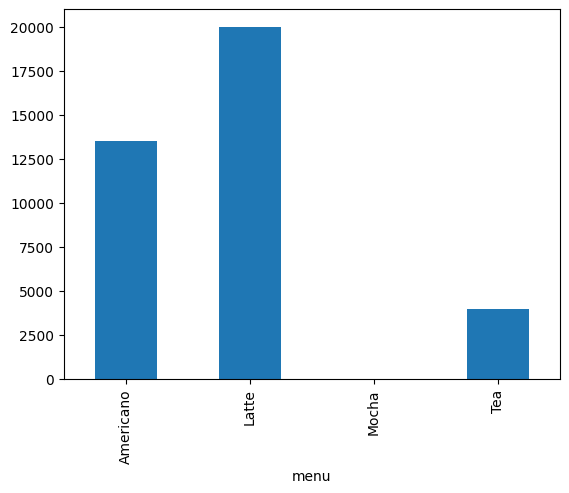

In [15]:
#####시각화 맛보기 (딱 1개)
df.groupby("menu")["sales"].sum().plot(kind="bar")

#메뉴별 총매출 한눈에 확인
#EDA + 커뮤니케이션 도구

In [16]:
###파일 저장 & 불러오기

#CSV 저장
df.to_csv("cafe_sales_clean.csv", index=False, encoding="utf-8-sig")

#CSV 읽기
df_csv = pd.read_csv("cafe_sales_clean.csv")
df_csv.head()



,date,menu,price,qty,paid,sales
0,2026-01-01,Americano,4500,2.0,True,9000.0
1,NaN,Latte,5000,1.0,True,5000.0
2,2026-01-02,Latte,0,2.0,False,0.0
3,2026-01-03,Mocha,5500,0.0,True,0.0
4,2026-01-03,Americano,4500,1.0,True,4500.0


In [17]:
#Excel 저장 (openpyxl 필요)
df.to_excel("cafe_sales_clean.xlsx", index=False)

#Excel 읽기
df_xlsx = pd.read_excel("cafe_sales_clean.xlsx")
df_xlsx.head()


,date,menu,price,qty,paid,sales
0,2026-01-01,Americano,4500,2,True,9000
1,NaT,Latte,5000,1,True,5000
2,2026-01-02,Latte,0,2,False,0
3,2026-01-03,Mocha,5500,0,True,0
4,2026-01-03,Americano,4500,1,True,4500


In [18]:
#JSON 저장
df.to_json(
    "cafe_sales_clean.json",
    orient="records",
    force_ascii=False,
    indent=2
)
#JSON 읽기
df_json = pd.read_json("cafe_sales_clean.json")
df_json.head()


,date,menu,price,qty,paid,sales
0,2026-01-01,Americano,4500,2,True,9000
1,NaT,Latte,5000,1,True,5000
2,2026-01-02,Latte,0,2,False,0
3,2026-01-03,Mocha,5500,0,True,0
4,2026-01-03,Americano,4500,1,True,4500



#오늘 실습의 핵심 요약 (요약이 아니라 기준점)
* DataFrame 구조 이해
* 컬럼 단위 사고
* 전처리는 "정답"이 아니라 "전략"
* 데이터는 항상 더럽다
* 전처리는 데이터 분석의 시작

In [19]:
#####실습 미션 (이해 체크)

#1 menu별로 총 매출(sales)을 구해서 출력해보기
df.groupby("menu")["sales"].sum()


menu
Americano    13500.0
Latte        20000.0
Mocha            0.0
Tea           4000.0
Name: sales, dtype: Float64

In [20]:
#2. paid == True인 주문만 골라서 CSV로 저장하기

paid_df = df[df["paid"] == True]

paid_df.to_csv(
    "cafe_sales_paid_only.csv",
    index=False,
    encoding="utf-8-sig"
)


In [21]:
#3. date에서 요일 컬럼 만들기

df["weekday"] = df["date"].dt.day_name()
df[["date", "weekday"]].head()


,date,weekday
0,2026-01-01,Thursday
1,NaT,NaN
2,2026-01-02,Friday
3,2026-01-03,Saturday
4,2026-01-03,Saturday


In [22]:
##실습 연결: sales = price * qty는 파생 피처(derived feature) 생성

import pandas as pd

raw = [
    {"date": "2026-01-01", "menu": "Americano", "price": "4500원", "qty": "2", "paid": "TRUE"},
    {"date": "2026/01/01", "menu": "Latte",     "price": "5,000",  "qty": 1,   "paid": "True"},
    {"date": "2026-01-02", "menu": "Latte",     "price": None,     "qty": 2,   "paid": "FALSE"},
    {"date": "2026-01-03", "menu": "Mocha",     "price": "5500",   "qty": None,"paid": True},
]

df = pd.DataFrame(raw)

# 1) price 전처리: "원", "," 제거 → 숫자
df["price_num"] = (
    df["price"]
    .astype("string")
    .str.replace(",", "", regex=False)
    .str.replace("원", "", regex=False)
)
df["price_num"] = pd.to_numeric(df["price_num"], errors="coerce")

# 2) qty 전처리: 문자열이어도 숫자로
df["qty_num"] = pd.to_numeric(df["qty"], errors="coerce")

# 3) 파생 피처(derived feature) 생성
df["sales"] = df["price_num"] * df["qty_num"]

print(df[["date", "menu", "price", "qty", "price_num", "qty_num", "sales"]])

         date       menu  price   qty  price_num  qty_num   sales
0  2026-01-01  Americano  4500원     2       4500      2.0  9000.0
1  2026/01/01      Latte  5,000     1       5000      1.0  5000.0
2  2026-01-02      Latte   None     2       <NA>      2.0    <NA>
3  2026-01-03      Mocha   5500  None       5500      NaN    <NA>


In [23]:
##실습 연결: df["paid"] 출력했을 때 왼쪽에 0,1,2…는 index

import pandas as pd

# 1) 예시 데이터 만들기 (DataFrame)
df = pd.DataFrame({
    "date": ["2026-01-01", "2026-01-01", "2026-01-02", "2026-01-03"],
    "menu": ["Americano", "Latte", "Latte", "Mocha"],
    "price": [4500, 5000, None, 5500],
    "qty": [2, 1, 2, None],
    "paid": ["TRUE", "True", "FALSE", True],
})

print("=== df (DataFrame) ===")
print(df)
print("\n자료형:", type(df))

# 2) 한 컬럼만 뽑기 → Series
s = df["paid"]   # Series
print("\n=== df['paid'] (Series) ===")
print(s)
print("\n자료형:", type(s))

# 3) Series 핵심 구성요소 3가지: values / index / dtype
print("\n[1] values")
print(s.values)

print("\n[2] index")
print(s.index)

print("\n[3] dtype")
print(s.dtype)

# (추가) df[['paid']] 는 DataFrame임(대괄호 2개 차이)
df_paid = df[["paid"]]
print("\n=== df[['paid']] (DataFrame) ===")
print(df_paid)
print("\n자료형:", type(df_paid))

=== df (DataFrame) ===
         date       menu   price  qty   paid
0  2026-01-01  Americano  4500.0  2.0   TRUE
1  2026-01-01      Latte  5000.0  1.0   True
2  2026-01-02      Latte     NaN  2.0  FALSE
3  2026-01-03      Mocha  5500.0  NaN   True

자료형: <class 'pandas.core.frame.DataFrame'>

=== df['paid'] (Series) ===
0     TRUE
1     True
2    FALSE
3     True
Name: paid, dtype: object

자료형: <class 'pandas.core.series.Series'>

[1] values
['TRUE' 'True' 'FALSE' True]

[2] index
RangeIndex(start=0, stop=4, step=1)

[3] dtype
object

=== df[['paid']] (DataFrame) ===
    paid
0   TRUE
1   True
2  FALSE
3   True

자료형: <class 'pandas.core.frame.DataFrame'>


**DataFrame**

- **2차원 표(행/열)**
- 여러 Series가 모여 있는 구조

**DataFrame의 핵심 구성요소**

- index: 행 번호(혹은 의미있는 키)
- columns: 컬럼 이름(피처)
- dtypes: 각 컬럼의 자료형

*흔한 오해: DataFrame 전체 dtype이 하나가 아니라 **컬럼마다 dtype이 다름***

///
**왜 dtype가 중요할까?**

dtype는 “파이썬이 데이터를 어떻게 해석하고 계산할지”를 결정합니다.

- 숫자형이어야 합/평균/정렬이 정상
- datetime이어야 날짜 연산/요일 추출 가능
- bool이어야 True/False 필터가 쉬움
- 범주형이면 그룹핑/집계가 효율적

실습에서 to_numeric, to_datetime을 쓴 이유 = dtype를 “분석 가능한 타입”으로 바꾸기 위해

In [24]:
import pandas as pd

# 1) 예시 DataFrame 만들기 (일부러 dtype가 섞이도록 구성)
df = pd.DataFrame({
    "date": ["2026-01-01", "2026/01/02", "2026-01-03"],   # 문자열(나중에 datetime으로 바꿀 예정)
    "menu": ["Americano", "Latte", "Mocha"],             # 문자열
    "price": ["4500원", "5,000", None],                  # 문자열 + 결측
    "qty": ["2", 1, None],                               # 문자열/숫자 + 결측
    "paid": ["TRUE", "FALSE", True],                     # 문자열/불리언 혼합
})

print("=== df (DataFrame) ===")
print(df)
print("\n자료형:", type(df))

# 2) DataFrame의 핵심 구성요소 확인
print("\n[1] index (행 번호/키)")
print(df.index)

print("\n[2] columns (컬럼 이름/피처)")
print(df.columns)

print("\n[3] dtypes (컬럼별 자료형)  ✅ 포인트!")
print(df.dtypes)

# 3) 흔한 오해 확인: df.dtype는 없다 (Series에만 dtype가 있음)
print("\n[오해 체크] DataFrame에는 df.dtype가 없고, df.dtypes로 '컬럼별' dtype을 봅니다.")
try:
    print(df.dtype)  # 일부러 에러 유도
except Exception as e:
    print("df.dtype 에러:", type(e).__name__, "-", e)

# 4) (추가 실습) 전처리 후 dtypes가 어떻게 바뀌는지 보기
df2 = df.copy()

# date -> datetime
df2["date"] = pd.to_datetime(df2["date"], errors="coerce")

# price -> 숫자 (원, 콤마 제거)
df2["price"] = (
    df2["price"].astype("string")
    .str.replace(",", "", regex=False)
    .str.replace("원", "", regex=False)
)
df2["price"] = pd.to_numeric(df2["price"], errors="coerce")

# qty -> 숫자
df2["qty"] = pd.to_numeric(df2["qty"], errors="coerce")

# paid -> 불리언 통일 (TRUE/FALSE/True 혼합 처리)
df2["paid"] = (
    df2["paid"].astype("string").str.upper()
    .map({"TRUE": True, "FALSE": False})
)

print("\n=== 전처리 후 df2 ===")
print(df2)
print("\n전처리 후 dtypes (컬럼별로 바뀜)")
print(df2.dtypes)

=== df (DataFrame) ===
         date       menu  price   qty   paid
0  2026-01-01  Americano  4500원     2   TRUE
1  2026/01/02      Latte  5,000     1  FALSE
2  2026-01-03      Mocha   None  None   True

자료형: <class 'pandas.core.frame.DataFrame'>

[1] index (행 번호/키)
RangeIndex(start=0, stop=3, step=1)

[2] columns (컬럼 이름/피처)
Index(['date', 'menu', 'price', 'qty', 'paid'], dtype='object')

[3] dtypes (컬럼별 자료형)  ✅ 포인트!
date     object
menu     object
price    object
qty      object
paid     object
dtype: object

[오해 체크] DataFrame에는 df.dtype가 없고, df.dtypes로 '컬럼별' dtype을 봅니다.
df.dtype 에러: AttributeError - 'DataFrame' object has no attribute 'dtype'

=== 전처리 후 df2 ===
        date       menu  price  qty   paid
0 2026-01-01  Americano   4500  2.0   True
1        NaT      Latte   5000  1.0  False
2 2026-01-03      Mocha   <NA>  NaN   True

전처리 후 dtypes (컬럼별로 바뀜)
date     datetime64[ns]
menu             object
price             Int64
qty             float64
paid               bool
dtype: objec

**실무에서 자주 쓰는 dtype 5종(필수)**

**(1) Numeric: int / float**

- qty, price, sales
- 결측치가 섞이면 int 대신 float로 뜨는 경우 많음(중요!)

**(2) Text: object/string**

- menu
- 숫자처럼 보여도 문자인 경우 많음(“5,000원”)

**(3) Boolean: bool**

- paid
- True/False 필터링에서 중요

**(4) Datetime: datetime64**

- date
- 날짜 기반 분석(요일/월별 추세/기간 필터)에 필수

**(5) Missing: NaN/None/NaT**

- “값이 없다”는 의미
- 수치형은 NaN, 날짜형은 NaT로 나타나는 경우가 많음

In [25]:
import pandas as pd

# 0) 일부러 "실무에서 흔한" 형태로 섞어서 만들기 (문자/숫자/결측/날짜)
df = pd.DataFrame([
    {"date": "2026-01-01", "menu": "Americano", "price": "4,500원", "qty": "2",  "paid": "TRUE"},
    {"date": "2026/01/02", "menu": "Latte",     "price": "5000",   "qty": 1,    "paid": "False"},
    {"date": None,         "menu": "Mocha",     "price": None,     "qty": None, "paid": True},
    {"date": "invalid",    "menu": "Latte",     "price": "5,000원","qty": "3",  "paid": "TRUE"},
])

print("=== 원본 df ===")
print(df)
print("\n원본 dtypes")
print(df.dtypes)

# ============================================================
# 1) Text: object/string  (menu, 그리고 숫자처럼 보이는 price/qty도 원래는 문자일 수 있음)
# ============================================================
df["menu"] = df["menu"].astype("string")   # 명시적으로 string으로
print("\n[Text] menu dtype:", df["menu"].dtype)

# ============================================================
# 2) Datetime: datetime64  (date → datetime)
#    실패/결측은 NaT로 들어감 (Missing의 날짜 버전)
# ============================================================
df["date"] = pd.to_datetime(df["date"], errors="coerce")
print("\n[Datetime] date dtype:", df["date"].dtype)
print("date 컬럼 값 확인 (NaT 포함):")
print(df["date"])

# ============================================================
# 3) Boolean: bool (paid 정리: TRUE/FALSE/True/False 섞임 처리)
#    실무에서 필터링에 매우 중요
# ============================================================
paid_map = {"TRUE": True, "FALSE": False, "True": True, "False": False}
df["paid"] = (
    df["paid"]
    .astype("string")
    .map(paid_map)
)
print("\n[Boolean] paid dtype(결측이 있으면 boolean이 될 수 있음):", df["paid"].dtype)
print("paid 컬럼 값 확인:")
print(df["paid"])

# ============================================================
# 4) Numeric: int/float  (price, qty → 숫자 변환)
#    결측이 섞이면 int 대신 float로 뜨는 경우가 많음(중요!)
# ============================================================
df["price"] = (
    df["price"]
    .astype("string")
    .str.replace(",", "", regex=False)
    .str.replace("원", "", regex=False)
)
df["price"] = pd.to_numeric(df["price"], errors="coerce")

df["qty"] = pd.to_numeric(df["qty"], errors="coerce")

# 파생 피처(derived feature): sales = price * qty
df["sales"] = df["price"] * df["qty"]

print("\n[Numeric] price dtype:", df["price"].dtype)
print("[Numeric] qty   dtype:", df["qty"].dtype)
print("[Numeric] sales dtype:", df["sales"].dtype)

# (중요) 결측 때문에 int가 float로 보이는 현상 확인
print("\n결측이 섞인 qty는 보통 float64로 보임 (NaN 때문)")
print(df[["qty"]])

# ============================================================
# 5) Missing: NaN/None/NaT 확인
#    - 수치형 결측: NaN
#    - 날짜형 결측: NaT
# ============================================================
print("\n[Missing] 결측치 요약")
print(df.isna().sum())

print("\n수치형 결측(NaN) 예시: price/qty/sales")
print(df[["price", "qty", "sales"]])

print("\n날짜형 결측(NaT) 예시: date")
print(df[["date"]])

# ============================================================
# 최종 결과 & 최종 dtypes
# ============================================================
print("\n=== 전처리 후 df ===")
print(df)

print("\n전처리 후 dtypes (컬럼별로 확인!)")
print(df.dtypes)

# (추가) paid=True인 행만 필터링 (Boolean 활용)
print("\npaid == True 필터링 결과")
print(df[df["paid"] == True][["date", "menu", "price", "qty", "sales", "paid"]])

=== 원본 df ===
         date       menu   price   qty   paid
0  2026-01-01  Americano  4,500원     2   TRUE
1  2026/01/02      Latte    5000     1  False
2        None      Mocha    None  None   True
3     invalid      Latte  5,000원     3   TRUE

원본 dtypes
date     object
menu     object
price    object
qty      object
paid     object
dtype: object

[Text] menu dtype: string

[Datetime] date dtype: datetime64[ns]
date 컬럼 값 확인 (NaT 포함):
0   2026-01-01
1          NaT
2          NaT
3          NaT
Name: date, dtype: datetime64[ns]

[Boolean] paid dtype(결측이 있으면 boolean이 될 수 있음): bool
paid 컬럼 값 확인:
0     True
1    False
2     True
3     True
Name: paid, dtype: bool

[Numeric] price dtype: Int64
[Numeric] qty   dtype: float64
[Numeric] sales dtype: Float64

결측이 섞인 qty는 보통 float64로 보임 (NaN 때문)
   qty
0  2.0
1  1.0
2  NaN
3  3.0

[Missing] 결측치 요약
date     3
menu     0
price    1
qty      1
paid     0
sales    1
dtype: int64

수치형 결측(NaN) 예시: price/qty/sales
   price  qty    sales
0   4500  2.0   

**dtype 확인/변환의 기본 원칙**

**확인: df.dtypes**

- 항상 전처리 전에 확인
- “생각한 타입”과 “실제 타입”이 다른 경우가 많음

**변환: 2가지 방식이 자주 등장**

1. **명시적 변환**: astype()
2. **파싱 변환**: pd.to_numeric, pd.to_datetime

*차이 요약*

- astype()는 “형식이 이미 맞아야” 잘 됨
- to_numeric/to_datetime는 “지저분한 문자열을 해석해서” 바꿀 수 있음 + errors 옵션 제공

In [26]:
import pandas as pd

# =========================
# 0) 실무형 "더러운" 원본 데이터
# =========================
df = pd.DataFrame([
    {"date": "2026-01-01", "menu": "Americano", "price": "4,500원", "qty": "2",   "paid": "TRUE"},
    {"date": "2026/01/02", "menu": "Latte",     "price": "5000",   "qty": 1,     "paid": "False"},
    {"date": None,         "menu": "Mocha",     "price": None,     "qty": None,  "paid": True},
    {"date": "invalid",    "menu": "Latte",     "price": "5,000원","qty": "3개", "paid": "TRUE"},
])

print("=== [전처리 전] df ===")
print(df)

# =========================
# 1) dtype는 항상 전처리 전에 먼저 확인
# =========================
print("\n=== [전처리 전] df.dtypes ===")
print(df.dtypes)

# "생각한 타입" vs "실제 타입"이 다른 대표 예시
print("\n(오해 예시) price/qty는 숫자처럼 보이지만 실제로는 문자열일 수 있음")
print("price 샘플:", df["price"].tolist())
print("qty 샘플  :", df["qty"].tolist())

# ============================================================
# 2) 변환 방식 1: 명시적 변환 astype()
#   - 형식이 이미 깔끔할 때 잘 됨
#   - 지저분하면 바로 에러가 나는 경우가 많음
# ============================================================
print("\n=== [astype() 테스트] ===")

# 2-1) qty를 int로 바꿔보려 하지만 "3개", None 때문에 실패할 수 있음
try:
    df["qty_int_try"] = df["qty"].astype(int)
    print("qty_int_try 성공:")
    print(df[["qty", "qty_int_try"]])
except Exception as e:
    print("qty -> astype(int) 실패:", type(e).__name__, "-", e)

# 2-2) paid는 "TRUE"/"False" 문자열이 섞여 있어서 bool로 단순 변환하면 의도대로 안될 수 있음
# (주의) 'False' 문자열도 bool('False')는 True가 되어버리는 문제
df["paid_bool_wrong"] = df["paid"].astype(bool)
print("\npaid -> astype(bool) (주의: 문자열 'False'도 True로 나올 수 있음)")
print(df[["paid", "paid_bool_wrong"]])

# ============================================================
# 3) 변환 방식 2: 파싱 변환(pd.to_numeric, pd.to_datetime)
#   - 지저분한 문자열을 "해석해서" 바꿔줌
#   - errors 옵션(coerce/raise/ignore)으로 실패 처리 가능
# ============================================================
print("\n=== [파싱 변환: to_numeric / to_datetime] ===")
df2 = df.copy()

# 3-1) price: "원", "," 제거 → to_numeric
df2["price_num"] = (
    df2["price"].astype("string")
    .str.replace(",", "", regex=False)
    .str.replace("원", "", regex=False)
)
df2["price_num"] = pd.to_numeric(df2["price_num"], errors="coerce")  # 실패는 NaN

# 3-2) qty: 숫자만 남기고 → to_numeric
df2["qty_num"] = (
    df2["qty"].astype("string")
    .str.replace("개", "", regex=False)   # "3개" 같은 케이스
)
df2["qty_num"] = pd.to_numeric(df2["qty_num"], errors="coerce")      # 실패는 NaN

# 3-3) date: datetime 변환 (invalid/None → NaT)
df2["date_dt"] = pd.to_datetime(df2["date"], errors="coerce")

print(df2[["price", "price_num", "qty", "qty_num", "date", "date_dt"]])

print("\n=== [파싱 변환 후] df2.dtypes ===")
print(df2[["price_num", "qty_num", "date_dt"]].dtypes)

# ============================================================
# 4) 차이 요약(핵심)
#   - astype(): 형식이 이미 맞아야 잘 됨(빡빡함)
#   - to_numeric/to_datetime(): 지저분한 문자열도 해석 + errors 옵션 제공(유연함)
# ============================================================
print("\n=== [차이 요약 체크] ===")
print("- astype(): 형식이 깨끗하면 빠르고 단순, 더럽거나 결측 섞이면 실패/의도와 다를 수 있음")
print("- to_numeric/to_datetime(): 문자열을 해석해서 변환, errors='coerce'면 실패를 NaN/NaT로 안전하게 처리")

# (보너스) 파생변수: sales = price * qty
df2["sales"] = df2["price_num"] * df2["qty_num"]
print("\n파생변수 sales 생성 결과")
print(df2[["menu", "price_num", "qty_num", "sales"]])

=== [전처리 전] df ===
         date       menu   price   qty   paid
0  2026-01-01  Americano  4,500원     2   TRUE
1  2026/01/02      Latte    5000     1  False
2        None      Mocha    None  None   True
3     invalid      Latte  5,000원    3개   TRUE

=== [전처리 전] df.dtypes ===
date     object
menu     object
price    object
qty      object
paid     object
dtype: object

(오해 예시) price/qty는 숫자처럼 보이지만 실제로는 문자열일 수 있음
price 샘플: ['4,500원', '5000', None, '5,000원']
qty 샘플  : ['2', 1, None, '3개']

=== [astype() 테스트] ===
qty -> astype(int) 실패: TypeError - int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

paid -> astype(bool) (주의: 문자열 'False'도 True로 나올 수 있음)
    paid  paid_bool_wrong
0   TRUE             True
1  False             True
2   True             True
3   TRUE             True

=== [파싱 변환: to_numeric / to_datetime] ===
    price  price_num   qty  qty_num        date    date_dt
0  4,500원       4500     2        2  2026-01-01 2026-01-01
1    5000       50

**errors="coerce"의 의미**
- 변환이 실패하면 에러로 멈추는 대신 **결측치(NaN/NaT)로 바꾼다**
- 즉 “문제 데이터를 일단 표시(결측)로 바꿔놓고, 다음 단계에서 처리”하는 전략

In [27]:
##실습 연결: "4500원"을 숫자로 못 바꾸면 NaN이 되고, 이후 fillna()나 삭제로 처리
import pandas as pd

# =========================
# 0) "문제 데이터"가 섞인 실무형 예시
# =========================
df = pd.DataFrame({
    "price_raw": ["4500원", "5,000", "무료", None, "5500", "4O00"],  # '무료', '4O00(영문 O)' 같은 문제값 포함
    "date_raw":  ["2026-01-01", "2026/01/02", "invalid", None, "2026-01-05", "2026-13-01"]  # invalid/불가능한 날짜 포함
})

print("=== 원본 df ===")
print(df)

# =========================
# 1) errors='raise' (기본: 실패하면 에러로 멈춤)
# =========================
print("\n=== errors='raise' (실패하면 멈춤) ===")
try:
    df["price_raise"] = pd.to_numeric(df["price_raw"], errors="raise")
except Exception as e:
    print("to_numeric errors='raise' 실패:", type(e).__name__, "-", e)

try:
    df["date_raise"] = pd.to_datetime(df["date_raw"], errors="raise")
except Exception as e:
    print("to_datetime errors='raise' 실패:", type(e).__name__, "-", e)

# =========================
# 2) errors='coerce' (실패하면 NaN/NaT로 바꿔서 계속 진행)
# =========================
print("\n=== errors='coerce' (실패 -> 결측으로 표시하고 계속 진행) ===")

# 숫자 파싱 전에 원/콤마 제거 (그래도 '무료', '4O00' 같은 건 실패)
clean_price = (
    df["price_raw"].astype("string")
    .str.replace(",", "", regex=False)
    .str.replace("원", "", regex=False)
)

df["price_num"] = pd.to_numeric(clean_price, errors="coerce")  # 실패 -> NaN
df["date_dt"]   = pd.to_datetime(df["date_raw"], errors="coerce")  # 실패 -> NaT

print(df)

print("\nprice_num에서 NaN(수치 결측), date_dt에서 NaT(날짜 결측) 확인")
print("price_num dtype:", df["price_num"].dtype)
print("date_dt   dtype:", df["date_dt"].dtype)

# =========================
# 3) "문제 데이터를 일단 결측으로 표시" 후 다음 단계에서 처리 전략
#    - (A) 채우기(fillna)
#    - (B) 제거(dropna)
# =========================
print("\n=== 다음 단계 처리 전략 예시 ===")

# (A) 결측 채우기: 예) price 결측은 0원으로, date 결측은 가장 많이 나온 날짜로(또는 특정 기준일로)
df_fill = df.copy()
df_fill["price_num"] = df_fill["price_num"].fillna(0)

most_common_date = df_fill["date_dt"].mode(dropna=True)
fallback_date = most_common_date.iloc[0] if len(most_common_date) > 0 else pd.Timestamp("2026-01-01")
df_fill["date_dt"] = df_fill["date_dt"].fillna(fallback_date)

print("\n(A) fillna 적용 후")
print(df_fill)

# (B) 결측 제거: 숫자/날짜 둘 중 하나라도 결측이면 제거
df_drop = df.dropna(subset=["price_num", "date_dt"])
print("\n(B) dropna 적용 후 (정상 변환된 행만 남김)")
print(df_drop)

# =========================
# 4) 실습 연결 메시지(핵심 요약)
# =========================
print("\n[핵심 요약]")
print("errors='coerce'는 '변환 실패 -> 에러로 멈추지 말고 NaN/NaT로 표시하고 다음 단계에서 처리' 전략입니다.")

=== 원본 df ===
  price_raw    date_raw
0     4500원  2026-01-01
1     5,000  2026/01/02
2        무료     invalid
3      None        None
4      5500  2026-01-05
5      4O00  2026-13-01

=== errors='raise' (실패하면 멈춤) ===
to_numeric errors='raise' 실패: ValueError - Unable to parse string "4500원" at position 0
to_datetime errors='raise' 실패: ValueError - time data "2026/01/02" doesn't match format "%Y-%m-%d", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

=== errors='coerce' (실패 -> 결측으로 표시하고 계속 진행) ===
  price_raw    date_raw  price_num    date_dt
0     4500원  2026-01-01       4500 2026-01-01
1     5,000  2026/01/02       5000        NaT
2        무료     invalid       <NA>        NaT
3  

**결측치(Missing Value) 이론: 왜 생기고 어떻게 다루나**

**1. 결측치가 생기는 대표 이유**

- 사람이 입력 누락
- 센서/시스템 오류
- 수집 과정에서 매칭 실패(조인 실패)
- “해당 항목이 존재하지 않음” (예: 옵션 없는 상품)

**2. 결측치를 다루는 3가지 전략(필수)**

1. **삭제(drop)**
    - 장점: 단순, 왜곡 줄일 수 있음
    - 단점: 데이터가 많이 줄면 분석력이 떨어짐
2. **대체(fill)**
    - 평균/중앙값/최빈값/0/특정값
    - 장점: 데이터 보존
    - 단점: 잘못 대체하면 결과 왜곡 가능
3. **모델 기반/규칙 기반 추정**
    - 더 고급(2회차 이후)

*실습 연결: 오늘은 연습용으로 price, qty를 0으로 채웠지만*

*현실에서는 “0이 의미있는가?”를 반드시 따져야 함.*

In [28]:
import pandas as pd

# =========================
# 0) 실무에서 흔한 결측이 섞인 데이터
# =========================
df = pd.DataFrame([
    {"date": "2026-01-01", "menu": "Americano", "price": 4500, "qty": 2},
    {"date": "2026-01-02", "menu": "Latte",     "price": None, "qty": 1},   # 입력 누락
    {"date": "2026-01-03", "menu": "Mocha",     "price": 5500, "qty": None},# 센서/집계 오류
    {"date": "2026-01-04", "menu": "Latte",     "price": None, "qty": None},# 조인 실패/옵션 없음
])

print("=== 원본 데이터 ===")
print(df)

# =========================
# 1) 결측치 확인 (반드시 먼저!)
# =========================
print("\n=== 결측치 개수 확인 ===")
print(df.isna().sum())

# =========================
# 2) 결측치 처리 방법 ① 삭제(drop)
# =========================
df_drop = df.dropna()

print("\n=== (1) 결측치 삭제(dropna) ===")
print(df_drop)
print("→ 장점: 단순 / 단점: 데이터 많이 줄어듦")

# =========================
# 3) 결측치 처리 방법 ② 대체(fill)
# =========================
df_fill = df.copy()

# (연습용) price, qty를 0으로 채움
df_fill["price"] = df_fill["price"].fillna(0)
df_fill["qty"]   = df_fill["qty"].fillna(0)

print("\n=== (2) 결측치 대체(fillna) ===")
print(df_fill)

# 파생 변수 생성
df_fill["sales"] = df_fill["price"] * df_fill["qty"]

print("\n파생변수 sales 생성 결과")
print(df_fill[["menu", "price", "qty", "sales"]])

# ⚠️ 중요 메시지
print("\n[중요]")
print("연습에서는 price/qty를 0으로 채웠지만,")
print("실무에서는 '0이 의미 있는 값인가?'를 반드시 고민해야 합니다.")

# =========================
# 4) 결측치 처리 방법 ③ (개념만) 모델/규칙 기반 추정
# =========================
print("\n=== (3) 모델/규칙 기반 추정 ===")
print("→ 평균 매출, 같은 메뉴의 평균 가격 등으로 추정 (고급 단계, 나중에 다룸)")

=== 원본 데이터 ===
         date       menu   price  qty
0  2026-01-01  Americano  4500.0  2.0
1  2026-01-02      Latte     NaN  1.0
2  2026-01-03      Mocha  5500.0  NaN
3  2026-01-04      Latte     NaN  NaN

=== 결측치 개수 확인 ===
date     0
menu     0
price    2
qty      2
dtype: int64

=== (1) 결측치 삭제(dropna) ===
         date       menu   price  qty
0  2026-01-01  Americano  4500.0  2.0
→ 장점: 단순 / 단점: 데이터 많이 줄어듦

=== (2) 결측치 대체(fillna) ===
         date       menu   price  qty
0  2026-01-01  Americano  4500.0  2.0
1  2026-01-02      Latte     0.0  1.0
2  2026-01-03      Mocha  5500.0  0.0
3  2026-01-04      Latte     0.0  0.0

파생변수 sales 생성 결과
        menu   price  qty   sales
0  Americano  4500.0  2.0  9000.0
1      Latte     0.0  1.0     0.0
2      Mocha  5500.0  0.0     0.0
3      Latte     0.0  0.0     0.0

[중요]
연습에서는 price/qty를 0으로 채웠지만,
실무에서는 '0이 의미 있는 값인가?'를 반드시 고민해야 합니다.

=== (3) 모델/규칙 기반 추정 ===
→ 평균 매출, 같은 메뉴의 평균 가격 등으로 추정 (고급 단계, 나중에 다룸)


**전처리 작업의 대표 패턴(실습을 이론으로 정리)**

**1. 문자열 정리 → 숫자 변환 패턴**

1. 불필요 문자 제거(원, 쉼표, 공백)
2. 숫자로 변환(to_numeric)
3. 실패는 결측으로(coerce)
4. 결측 처리

*이게 실무에서 매우 자주 반복되는 “클리닝 패턴”이다.*

In [29]:
import pandas as pd

# =========================
# 0) 실무형 더러운 데이터(문자/기호/공백/이상값/결측 섞임)
# =========================
df = pd.DataFrame({
    "menu": ["Americano", "Latte", "Mocha", "Latte", "Americano"],
    "price_raw": ["4,500원", " 5000 ", "무료", None, "5,2oo원"],   # 무료, None, 5,2oo(오타) 포함
    "qty_raw":   ["2", " 1 ", "3개", None, "two"],               # 3개, None, two 포함
})

print("=== 원본 데이터 ===")
print(df)

# =========================
# 1) 불필요 문자 제거(원, 쉼표, 공백 등)
#    - 실무에서는 먼저 string으로 맞춘 뒤 정리하는 게 안전
# =========================
price_clean = (
    df["price_raw"].astype("string")
    .str.strip()                           # 양쪽 공백 제거
    .str.replace(",", "", regex=False)     # 쉼표 제거
    .str.replace("원", "", regex=False)    # '원' 제거
)

qty_clean = (
    df["qty_raw"].astype("string")
    .str.strip()
    .str.replace("개", "", regex=False)    # '3개' -> '3'
)

print("\n=== 1) 문자 제거 후(price_clean / qty_clean) ===")
print(pd.DataFrame({"price_clean": price_clean, "qty_clean": qty_clean}))

# =========================
# 2) 숫자로 변환(to_numeric)
# 3) 실패는 결측으로(coerce)  -> NaN
# =========================
df["price"] = pd.to_numeric(price_clean, errors="coerce")
df["qty"]   = pd.to_numeric(qty_clean,   errors="coerce")

print("\n=== 2~3) to_numeric + errors='coerce' 결과 ===")
print(df[["price_raw", "price", "qty_raw", "qty"]])

# =========================
# 4) 결측 처리(연습용: 0으로 채우기 / 또는 dropna)
# =========================
df_fill = df.copy()
df_fill["price"] = df_fill["price"].fillna(0)
df_fill["qty"]   = df_fill["qty"].fillna(0)

# 파생변수 생성(실습 연결)
df_fill["sales"] = df_fill["price"] * df_fill["qty"]

print("\n=== 4) 결측 처리(fillna) + 파생변수(sales) ===")
print(df_fill[["menu", "price_raw", "qty_raw", "price", "qty", "sales"]])

# (선택) 결측을 제거하는 버전
df_drop = df.dropna(subset=["price", "qty"]).copy()
df_drop["sales"] = df_drop["price"] * df_drop["qty"]

print("\n=== (선택) 결측 제거(dropna) + sales ===")
print(df_drop[["menu", "price_raw", "qty_raw", "price", "qty", "sales"]])

# 결측치 개수 요약
print("\n=== 결측치 개수 요약 ===")
print(df[["price", "qty"]].isna().sum())

=== 원본 데이터 ===
        menu price_raw qty_raw
0  Americano    4,500원       2
1      Latte     5000       1 
2      Mocha        무료      3개
3      Latte      None    None
4  Americano    5,2oo원     two

=== 1) 문자 제거 후(price_clean / qty_clean) ===
  price_clean qty_clean
0        4500         2
1        5000         1
2          무료         3
3        <NA>      <NA>
4        52oo       two

=== 2~3) to_numeric + errors='coerce' 결과 ===
  price_raw  price qty_raw   qty
0    4,500원   4500       2     2
1     5000    5000      1      1
2        무료   <NA>      3개     3
3      None   <NA>    None  <NA>
4    5,2oo원   <NA>     two  <NA>

=== 4) 결측 처리(fillna) + 파생변수(sales) ===
        menu price_raw qty_raw  price  qty  sales
0  Americano    4,500원       2   4500    2   9000
1      Latte     5000       1    5000    1   5000
2      Mocha        무료      3개      0    3      0
3      Latte      None    None      0    0      0
4  Americano    5,2oo원     two      0    0      0

=== (선택) 결측 제거(dropna) + 

**2. 범주값 통일 패턴(TRUE/True/false…)**

- 대소문자/표기 방식이 다르면 그룹핑/필터가 깨짐
- 통일 규칙을 만든다(대문자 변환 후 매핑 등)

*실습 연결: paid를 대문자로 만든 뒤 {"TRUE": True, "FALSE": False} 매핑*

In [30]:
import pandas as pd

# =========================
# 0) 실무에서 흔한 "표기 흔들림" 예시 데이터
# =========================
df = pd.DataFrame({
    "paid": ["TRUE", "True", "true", "FALSE", "False", "false", True, False, None, "  true  ", "Y", "N", "1", "0"],
    "menu": ["A","A","B","B","C","C","D","D","E","E","F","F","G","G"]
})

print("=== 원본 paid 값(표기 흔들림) ===")
print(df["paid"].tolist())

# (문제 체감) 표기가 다르면 그룹핑/필터가 깨짐
print("\n=== 원본 상태 그룹핑(잘게 쪼개짐) ===")
print(df["paid"].value_counts(dropna=False))

# =========================
# 1) 통일 규칙 만들기: 문자열로 만든 후 공백 제거 + 대문자 변환
# =========================
paid_norm = df["paid"].astype("string").str.strip().str.upper()

# =========================
# 2) 매핑 규칙: TRUE/FALSE 외에 실무에서 자주 섞이는 표현도 같이 처리
#    - 필요한 것만 남겨도 되지만, 예시는 조금 넓게 커버
# =========================
paid_map = {
    "TRUE": True, "FALSE": False,
    "Y": True, "N": False,
    "YES": True, "NO": False,
    "1": True, "0": False,
    "T": True, "F": False,
}

# 3) 매핑 적용 (매핑 실패/알 수 없는 값은 <NA>로 남김)
df["paid_bool"] = paid_norm.map(paid_map)

print("\n=== 통일 후 paid_bool ===")
print(df[["paid", "paid_bool"]])

print("\n=== 통일 후 그룹핑(깔끔하게 2개로) ===")
print(df["paid_bool"].value_counts(dropna=False))

# =========================
# 4) 실무 팁: 매핑 실패(결측) 처리 전략
#    - (A) 결측 그대로 두고 제외하고 분석
#    - (B) 결측을 False로 볼지? (의미에 따라 다름)
#    - (C) 문제 데이터 따로 확인해서 원인 추적
# =========================
unknown = df[df["paid_bool"].isna()][["paid"]]
print("\n=== 매핑 실패(알 수 없는 값) 확인 ===")
print(unknown)

# 예: 결제 성공률 계산(결측 제외)
success_rate = df["paid_bool"].mean(skipna=True)  # True=1, False=0 평균
print("\n결제 성공률(결측 제외):", success_rate)

=== 원본 paid 값(표기 흔들림) ===
['TRUE', 'True', 'true', 'FALSE', 'False', 'false', True, False, None, '  true  ', 'Y', 'N', '1', '0']

=== 원본 상태 그룹핑(잘게 쪼개짐) ===
paid
TRUE        1
True        1
true        1
FALSE       1
False       1
false       1
True        1
False       1
None        1
  true      1
Y           1
N           1
1           1
0           1
Name: count, dtype: int64

=== 통일 후 paid_bool ===
        paid paid_bool
0       TRUE      True
1       True      True
2       true      True
3      FALSE     False
4      False     False
5      false     False
6       True      True
7      False     False
8       None       NaN
9     true        True
10         Y      True
11         N     False
12         1      True
13         0     False

=== 통일 후 그룹핑(깔끔하게 2개로) ===
paid_bool
True     7
False    6
NaN      1
Name: count, dtype: int64

=== 매핑 실패(알 수 없는 값) 확인 ===
   paid
8  None

결제 성공률(결측 제외): 0.5384615384615384


**3. 파생 피처 생성의 의미**

- 원본 데이터만으로는 표현이 부족할 때
- 분석 목적에 딱 맞게 새 컬럼을 만든다

예:

- sales = price * qty
- weekday = date.dt.day_name()

In [31]:
import pandas as pd

# 0) 예시 데이터
df = pd.DataFrame([
    {"date": "2026-01-01", "menu": "Americano", "price": "4,500원", "qty": "2"},
    {"date": "2026/01/02", "menu": "Latte",     "price": "5000",   "qty": 1},
    {"date": "2026-01-03", "menu": "Mocha",     "price": None,     "qty": 3},
    {"date": "invalid",    "menu": "Latte",     "price": "5,000원","qty": None},
])

print("=== 원본 df ===")
print(df)

# 1) 전처리: price/qty 숫자화, date 날짜화 (실패는 결측 처리)
df["price"] = (
    df["price"].astype("string")
    .str.replace(",", "", regex=False)
    .str.replace("원", "", regex=False)
)
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["qty"] = pd.to_numeric(df["qty"], errors="coerce")
df["date"] = pd.to_datetime(df["date"], errors="coerce")

print("\n=== 전처리 후 df ===")
print(df)
print("\n전처리 후 dtypes")
print(df.dtypes)

# 2) 파생 피처 1: sales = price * qty
df["sales"] = df["price"] * df["qty"]

# 3) 파생 피처 2: weekday = date.dt.day_name()
# (한국어 요일로 보고 싶으면 아래 mapping 사용)
df["weekday_en"] = df["date"].dt.day_name()

weekday_map = {
    "Monday": "월", "Tuesday": "화", "Wednesday": "수",
    "Thursday": "목", "Friday": "금", "Saturday": "토", "Sunday": "일"
}
df["weekday"] = df["weekday_en"].map(weekday_map)

print("\n=== 파생 피처 생성 결과 ===")
print(df[["date", "menu", "price", "qty", "sales", "weekday_en", "weekday"]])

# (선택) weekday 기준으로 매출 집계
print("\n=== 요일별 매출 합계(결측 제외 자동 처리) ===")
print(df.groupby("weekday")["sales"].sum())

=== 원본 df ===
         date       menu   price   qty
0  2026-01-01  Americano  4,500원     2
1  2026/01/02      Latte    5000     1
2  2026-01-03      Mocha    None     3
3     invalid      Latte  5,000원  None

=== 전처리 후 df ===
        date       menu  price  qty
0 2026-01-01  Americano   4500  2.0
1        NaT      Latte   5000  1.0
2 2026-01-03      Mocha   <NA>  3.0
3        NaT      Latte   5000  NaN

전처리 후 dtypes
date     datetime64[ns]
menu             object
price             Int64
qty             float64
dtype: object

=== 파생 피처 생성 결과 ===
        date       menu  price  qty   sales weekday_en weekday
0 2026-01-01  Americano   4500  2.0  9000.0   Thursday       목
1        NaT      Latte   5000  1.0  5000.0        NaN     NaN
2 2026-01-03      Mocha   <NA>  3.0    <NA>   Saturday       토
3        NaT      Latte   5000  NaN    <NA>        NaN     NaN

=== 요일별 매출 합계(결측 제외 자동 처리) ===
weekday
목    9000.0
토       0.0
Name: sales, dtype: Float64


**파일 입출력(CSV/Excel/JSON): “분석의 시작과 끝”**

**1. CSV vs Excel vs JSON 언제 쓰나?**

**CSV**

- 가장 범용적, 가볍고 빠름, 어디서나 열림
- 단점: 데이터 타입 정보가 약함(읽을 때 dtype 흔들림)

**Excel**

- 비개발자와 협업에 매우 좋음
- 단점: 무겁고, 버전/엔진(openpyxl) 문제

**JSON**

- 웹/API/서버 간 데이터 교환에 강함
- 중첩 구조도 가능
- 단점: 테이블 분석 관점에서는 CSV가 더 직관적일 때도 많음

In [32]:
import pandas as pd

# 예시 데이터(테이블)
df = pd.DataFrame([
    {"date": "2026-01-01", "menu": "Americano", "price": 4500, "qty": 2, "paid": True},
    {"date": "2026-01-02", "menu": "Latte",     "price": 5000, "qty": 1, "paid": False},
])

# 1) 저장 경로
csv_path   = "sales.csv"
excel_path = "sales.xlsx"
json_path  = "sales.json"

# -----------------------
# CSV 저장/읽기
# -----------------------
df.to_csv(csv_path, index=False, encoding="utf-8-sig")
df_csv = pd.read_csv(csv_path)

print("=== CSV로 읽은 df ===")
print(df_csv)
print(df_csv.dtypes)   # dtype 흔들릴 수 있음

# -----------------------
# Excel 저장/읽기
# -----------------------
df.to_excel(excel_path, index=False)  # 기본 엔진: openpyxl
df_xlsx = pd.read_excel(excel_path)

print("\n=== Excel로 읽은 df ===")
print(df_xlsx)
print(df_xlsx.dtypes)

# -----------------------
# JSON 저장/읽기
# -----------------------
# records 형태가 테이블과 가장 호환이 좋음
df.to_json(json_path, orient="records", force_ascii=False, indent=2)
df_json = pd.read_json(json_path)

print("\n=== JSON로 읽은 df ===")
print(df_json)
print(df_json.dtypes)

=== CSV로 읽은 df ===
         date       menu  price  qty   paid
0  2026-01-01  Americano   4500    2   True
1  2026-01-02      Latte   5000    1  False
date     object
menu     object
price     int64
qty       int64
paid       bool
dtype: object



=== Excel로 읽은 df ===
         date       menu  price  qty   paid
0  2026-01-01  Americano   4500    2   True
1  2026-01-02      Latte   5000    1  False
date     object
menu     object
price     int64
qty       int64
paid       bool
dtype: object

=== JSON로 읽은 df ===
        date       menu  price  qty   paid
0 2026-01-01  Americano   4500    2   True
1 2026-01-02      Latte   5000    1  False
date     datetime64[ns]
menu             object
price             int64
qty               int64
paid               bool
dtype: object


**2. 저장할 때 반드시 알아야 하는 옵션 3개**

**(1) index 저장 여부**

- index=False를 자주 씀
- 분석용 인덱스가 “의미 있는 키”가 아니라면 파일에 넣지 않는 편이 깔끔

**(2) 인코딩(특히 CSV 한글)**

- utf-8-sig는 엑셀에서 한글 깨짐 줄이는데 도움

**(3) JSON orient**

- orient="records"는 “행 단위 리스트” 형태로 많이 씀
    - API/저장에 깔끔

In [33]:
import pandas as pd
import json

# =========================
# 0) 예시 데이터
# =========================
df = pd.DataFrame([
    {"date": "2026-01-01", "menu": "아메리카노", "price": 4500, "qty": 2},
    {"date": "2026-01-02", "menu": "라떼",       "price": 5000, "qty": 1},
])
df["sales"] = df["price"] * df["qty"]

print("=== 원본 df ===")
print(df)

# =========================
# (1) index 저장 여부: index=False를 자주 씀
# =========================
print("\n[1] index 저장 여부 비교")

df.to_csv("sales_with_index.csv", index=True,  encoding="utf-8-sig")
df.to_csv("sales_no_index.csv",   index=False, encoding="utf-8-sig")

print("- sales_with_index.csv : index 포함")
print("- sales_no_index.csv   : index 제외 (실무에서 더 깔끔한 경우 많음)")

# 실제로 다시 읽어보면 차이가 보임
a = pd.read_csv("sales_with_index.csv")
b = pd.read_csv("sales_no_index.csv")
print("\nCSV 다시 읽기 비교")
print("with_index columns:", a.columns.tolist())  # 보통 Unnamed: 0 같은 컬럼이 생김
print("no_index   columns:", b.columns.tolist())

# =========================
# (2) 인코딩(특히 CSV 한글): utf-8-sig
# =========================
print("\n[2] 인코딩 비교 (엑셀 한글 깨짐 방지용)")

df.to_csv("sales_utf8.csv",     index=False, encoding="utf-8")      # 기본 utf-8
df.to_csv("sales_utf8sig.csv",  index=False, encoding="utf-8-sig")  # 엑셀 호환에 도움

print("- sales_utf8.csv     : utf-8")
print("- sales_utf8sig.csv  : utf-8-sig (엑셀에서 한글 깨짐 줄이는데 도움)")

# =========================
# (3) JSON orient: records (행 단위 리스트)
# =========================
print("\n[3] JSON orient 비교: records vs 기본")

# records: [{행1}, {행2}, ...]  (API/저장에 깔끔)
df.to_json("sales_records.json", orient="records", force_ascii=False, indent=2)

# 기본 orient (columns): {"컬럼명": {"0":값, "1":값}} 형태로 나오기 쉬움
df.to_json("sales_columns.json", orient="columns", force_ascii=False, indent=2)

print("- sales_records.json : orient='records' (행 단위 리스트, 실무에서 자주 사용)")
print("- sales_columns.json : orient='columns' (컬럼 중심 구조)")

# JSON 내용을 확인(출력)
print("\nrecords JSON 내용 미리보기")
with open("sales_records.json", "r", encoding="utf-8") as f:
    print(f.read())

print("\ncolumns JSON 내용 미리보기")
with open("sales_columns.json", "r", encoding="utf-8") as f:
    print(f.read())

=== 원본 df ===
         date   menu  price  qty  sales
0  2026-01-01  아메리카노   4500    2   9000
1  2026-01-02     라떼   5000    1   5000

[1] index 저장 여부 비교
- sales_with_index.csv : index 포함
- sales_no_index.csv   : index 제외 (실무에서 더 깔끔한 경우 많음)

CSV 다시 읽기 비교
with_index columns: ['Unnamed: 0', 'date', 'menu', 'price', 'qty', 'sales']
no_index   columns: ['date', 'menu', 'price', 'qty', 'sales']

[2] 인코딩 비교 (엑셀 한글 깨짐 방지용)
- sales_utf8.csv     : utf-8
- sales_utf8sig.csv  : utf-8-sig (엑셀에서 한글 깨짐 줄이는데 도움)

[3] JSON orient 비교: records vs 기본
- sales_records.json : orient='records' (행 단위 리스트, 실무에서 자주 사용)
- sales_columns.json : orient='columns' (컬럼 중심 구조)

records JSON 내용 미리보기
[
  {
    "date":"2026-01-01",
    "menu":"아메리카노",
    "price":4500,
    "qty":2,
    "sales":9000
  },
  {
    "date":"2026-01-02",
    "menu":"라떼",
    "price":5000,
    "qty":1,
    "sales":5000
  }
]

columns JSON 내용 미리보기
{
  "date":{
    "0":"2026-01-01",
    "1":"2026-01-02"
  },
  "menu":{
    "0":"아메리카노",
    "1":"라떼

**시각화는 “정답을 만드는 도구”가 아니라 “이상함을 찾는 도구”**

입문용 꼭 강조할 포인트:

- 시각화는 예쁘게 꾸미기보다,
    - 값이 말이 되는지
    - 결측치/이상치가 있는지
    - 그룹별 차이가 있는지

를 **빠르게 확인하는 “검증 도구”이다.**

입문용 “3개만 그려도 충분” 체크리스트

1) 분포 확인 (Histogram)

- “값이 주로 어디에 몰려있지?”
- “튀는 값(이상치)이 있나?”

2) 결측치 패턴 확인 (막대/표)

- “어떤 컬럼에서 결측이 많이 나오지?”
- “특정 날짜/메뉴에서만 비는 건가?” (수집/조인 문제 힌트)

3) 그룹 비교 (Bar/Box)

- “메뉴별 매출 차이”
- “요일별 매출 차이”
- “paid=True/False 차이”

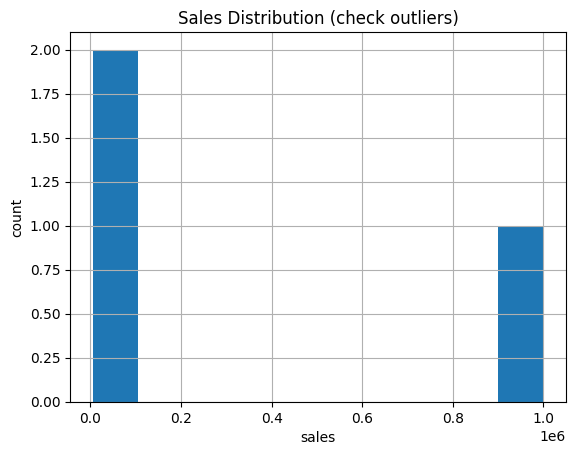

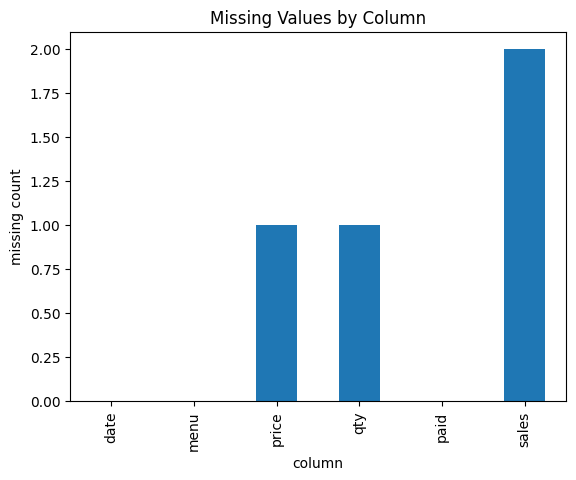

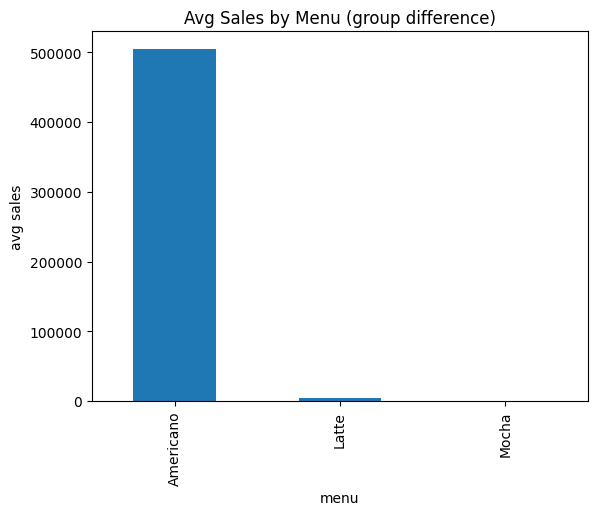

In [34]:
##실습 코드(입문용): “이상함 찾기” 3종 세트
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터(일부러 이상치/결측 섞음)
df = pd.DataFrame([
    {"date": "2026-01-01", "menu": "Americano", "price": 4500, "qty": 2, "paid": True},
    {"date": "2026-01-01", "menu": "Latte",     "price": 5000, "qty": 1, "paid": True},
    {"date": "2026-01-02", "menu": "Latte",     "price": None, "qty": 2, "paid": False},  # 결측
    {"date": "2026-01-03", "menu": "Mocha",     "price": 5500, "qty": None, "paid": True},# 결측
    {"date": "2026-01-03", "menu": "Americano", "price": 999999, "qty": 1, "paid": True}, # 이상치
])

df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["sales"] = df["price"] * df["qty"]

# -------------------------
# 1) 값이 말이 되는지(분포/이상치) 확인: sales 히스토그램
# -------------------------
plt.figure()
df["sales"].dropna().hist(bins=10)
plt.title("Sales Distribution (check outliers)")
plt.xlabel("sales")
plt.ylabel("count")
plt.show()

# -------------------------
# 2) 결측치가 있는지 빠르게 확인: 컬럼별 결측 개수
# -------------------------
plt.figure()
df.isna().sum().plot(kind="bar")
plt.title("Missing Values by Column")
plt.xlabel("column")
plt.ylabel("missing count")
plt.show()

# -------------------------
# 3) 그룹별 차이가 있는지 확인: 메뉴별 평균 매출
# -------------------------
plt.figure()
(df.groupby("menu")["sales"].mean()).plot(kind="bar")
plt.title("Avg Sales by Menu (group difference)")
plt.xlabel("menu")
plt.ylabel("avg sales")
plt.show()


In [ ]:
#!python -m jupyter nbconvert --to markdown 01_python_cafe.ipynb

[NbConvertApp] Converting notebook 01_python_cafe.ipynb to markdown
[NbConvertApp] Support files will be in 01_python_cafe_files\
[NbConvertApp] Making directory 01_python_cafe_files
[NbConvertApp] Writing 60417 bytes to 01_python_cafe.md
